# Environmental Quality Index (EQI) for California Counties
**Author:** Shilpa Kannan
**Last Updated:** October 5, 2025

---

## 1. Introduction

### Objective
The purpose of this notebook is to perform the initial data loading, exploration, and cleaning of the three primary datasets for the EQI project.

### Plan
1. **Introduction**
2. **Setup:** Import necessary libraries.
3. **Data Loading:** Load the CDC, EPA, and Census datasets from their CSV files.
4. **Initial Exploration:** Inspect each DataFrame to understand its structure, identify missing values, and check data types.
5. **Initial Cleaning:** Perform basic cleaning tasks such as filtering, renaming columns, and handling missing data.

## 2. Setup

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## 3. Data Loading

In [101]:
# Define file paths
CDC_HEALTH_DATA_PATH = '../data/cdc_places_county_california_2024.csv'
EPA_AQI_DATA_PATH = '../data/epa_aqi_county_usa_2024.csv'
CENSUS_DATA_PATH = '../data/census_economic_county_california_2024.csv'

# Load the data into DataFrames
cdc_health_df = pd.read_csv(CDC_HEALTH_DATA_PATH)
epa_aqi_df = pd.read_csv(EPA_AQI_DATA_PATH)
census_economic_df = pd.read_csv(CENSUS_DATA_PATH)

print("Datasets loaded successfully!")

Datasets loaded successfully!


## 4. Initial Data Exploration

### 4.1 Exploration of CDC Health Data

In [102]:
cdc_health_df.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,CA,California,Butte,BRFSS,Health Outcomes,Stroke among adults,%,Age-adjusted prevalence,3.2,...,2.9,3.5,"207,303","165,784",6007,HLTHOUT,STROKE,AgeAdjPrv,Stroke,POINT (-121.60115169224 39.6663795928272)
1,2022,CA,California,Calaveras,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Age-adjusted prevalence,9.4,...,8.1,10.8,"46,563","38,508",6009,HLTHOUT,DIABETES,AgeAdjPrv,Diabetes,POINT (-120.554047814815 38.2047708244318)
2,2022,CA,California,Imperial,BRFSS,Health Outcomes,Depression among adults,%,Age-adjusted prevalence,20.7,...,17.5,24.2,"178,713","128,478",6025,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-115.365089023702 33.0401896009011)
3,2022,CA,California,Kern,BRFSS,Health Status,Frequent mental distress among adults,%,Crude prevalence,18.8,...,17.0,20.6,"916,108","655,754",6029,HLTHSTAT,MHLTH,CrdPrv,Frequent Mental Distress,POINT (-118.730029086317 35.3428262386385)
4,2022,CA,California,Lake,BRFSS,Health Outcomes,Current asthma among adults,%,Crude prevalence,10.8,...,9.6,12.2,"68,191","53,338",6033,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-122.753413599125 39.0999886976907)


In [103]:
cdc_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        4640 non-null   int64  
 1   StateAbbr                   4640 non-null   object 
 2   StateDesc                   4640 non-null   object 
 3   LocationName                4640 non-null   object 
 4   DataSource                  4640 non-null   object 
 5   Category                    4640 non-null   object 
 6   Measure                     4640 non-null   object 
 7   Data_Value_Unit             4640 non-null   object 
 8   Data_Value_Type             4640 non-null   object 
 9   Data_Value                  4640 non-null   float64
 10  Data_Value_Footnote_Symbol  0 non-null      float64
 11  Data_Value_Footnote         0 non-null      float64
 12  Low_Confidence_Limit        4640 non-null   float64
 13  High_Confidence_Limit       4640 

**Observation:** The `cdc_health_df` DataFrame was explored with the following findings:
1.  **Missing Values:** The dataset contains no missing values.
2.  **Unnecessary Columns:** It includes several "footnote" columns that are not useful for analysis and should be removed during the cleaning stage.

### 4.2 Exploration of EPA Air Quality Data

In [104]:
epa_aqi_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2024,355,278,77,0,0,0,0,90,58,40,0,0,127,228,0
1,Alabama,Clay,2024,354,307,47,0,0,0,0,75,52,29,0,0,0,354,0
2,Alabama,DeKalb,2024,366,277,89,0,0,0,0,87,57,43,0,0,242,124,0
3,Alabama,Elmore,2024,234,231,3,0,0,0,0,58,46,37,0,0,234,0,0
4,Alabama,Etowah,2024,362,212,150,0,0,0,0,93,60,47,0,0,84,278,0


In [105]:
epa_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                995 non-null    object
 1   County                               995 non-null    object
 2   Year                                 995 non-null    int64 
 3   Days with AQI                        995 non-null    int64 
 4   Good Days                            995 non-null    int64 
 5   Moderate Days                        995 non-null    int64 
 6   Unhealthy for Sensitive Groups Days  995 non-null    int64 
 7   Unhealthy Days                       995 non-null    int64 
 8   Very Unhealthy Days                  995 non-null    int64 
 9   Hazardous Days                       995 non-null    int64 
 10  Max AQI                              995 non-null    int64 
 11  90th Percentile AQI                  995 non-

**Observation:** The `epa_aqi_df` DataFrame was explored with the following findings:
1.  **Missing Values:** The dataset contains no missing values.
2.  **Data Scope:** The dataset covers the entire United States and will need to be filtered to only include California during the cleaning stage.

### 4.3 Exploration of Census Economic Data

In [106]:
census_economic_df.head()

,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,DP03_0004M,...,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,Unnamed: 550
0,Geography,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,NaN
1,0500000US06001,"Alameda County, California",1372398,2344,924414,8513,921327,8617,876021,9705,...,0.6,8.3,0.6,11.5,1.2,5.1,0.7,21.6,1.4,NaN
2,0500000US06007,"Butte County, California",171256,813,101653,3075,101653,3075,93926,3257,...,2.0,21.7,2.6,8.7,2.3,13.8,3.3,33.1,3.7,NaN
3,0500000US06013,"Contra Costa County, California",954525,1860,608716,8124,607801,8019,561466,8348,...,0.8,8.4,1.1,6.8,1.2,6.6,1.2,18.5,1.9,NaN
4,0500000US06017,"El Dorado County, California",160464,718,94375,3039,94375,3039,91737,3094,...,1.4,8.7,1.9,5.6,1.7,5.4,1.9,18.9,3.8,NaN


In [107]:
census_economic_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 551 columns):
 #    Column        Dtype  
---   ------        -----  
 0    GEO_ID        object 
 1    NAME          object 
 2    DP03_0001E    object 
 3    DP03_0001M    object 
 4    DP03_0002E    object 
 5    DP03_0002M    object 
 6    DP03_0003E    object 
 7    DP03_0003M    object 
 8    DP03_0004E    object 
 9    DP03_0004M    object 
 10   DP03_0005E    object 
 11   DP03_0005M    object 
 12   DP03_0006E    object 
 13   DP03_0006M    object 
 14   DP03_0007E    object 
 15   DP03_0007M    object 
 16   DP03_0008E    object 
 17   DP03_0008M    object 
 18   DP03_0009E    object 
 19   DP03_0009M    object 
 20   DP03_0010E    object 
 21   DP03_0010M    object 
 22   DP03_0011E    object 
 23   DP03_0011M    object 
 24   DP03_0012E    object 
 25   DP03_0012M    object 
 26   DP03_0013E    object 
 27   DP03_0013M    object 
 28   DP03_0014E    object 
 29   DP03_0014M    object 


**Observation:** The `census_economic_df` DataFrame presents several challenges for the cleaning phase.
1.  **Missing Values:** The dataset contains no missing values.
2.  **Column Names:** The column names are cryptic codes and will need to be renamed using the provided metadata file.
3.  **Data Types:** Most columns are incorrectly typed as `object` and will need to be converted to numeric types for analysis.

## 5. Initial Data Cleaning

### 5.1 Clean CDC Health Data

In [108]:
# List out current columns in CDC dataframe
cdc_health_df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'TotalPop18plus', 'LocationID', 'CategoryID', 'MeasureId',
       'DataValueTypeID', 'Short_Question_Text', 'Geolocation'],
      dtype='object')

In [109]:
# Create a list of the footnote columns to remove
columns_to_drop = [
    # Footnote columns
    'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote',
    # Redundant ID columns
    'CategoryID',
    'MeasureId',
    'DataValueTypeID',
    # Redundant Measure description
    'Short_Question_Text',
    # Redundant geographic and source columns
    'StateAbbr',
    'StateDesc',
    'DataSource'
]

# Drop the columns
cdc_health_df_cleaned = cdc_health_df.drop(columns=columns_to_drop)

# Confirm the columns are gone
print("Unneeded columns removed successfully.")
cdc_health_df_cleaned.info()

Unneeded columns removed successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4640 non-null   int64  
 1   LocationName           4640 non-null   object 
 2   Category               4640 non-null   object 
 3   Measure                4640 non-null   object 
 4   Data_Value_Unit        4640 non-null   object 
 5   Data_Value_Type        4640 non-null   object 
 6   Data_Value             4640 non-null   float64
 7   Low_Confidence_Limit   4640 non-null   float64
 8   High_Confidence_Limit  4640 non-null   float64
 9   TotalPopulation        4640 non-null   object 
 10  TotalPop18plus         4640 non-null   object 
 11  LocationID             4640 non-null   int64  
 12  Geolocation            4640 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 471.4+ KB


In [110]:
# Count the number of duplicated rows
duplicate_count = cdc_health_df_cleaned.duplicated().sum()

print(f"Found {duplicate_count} duplicate rows.")

Found 0 duplicate rows.


In [111]:
# Create a dictionary to map old names to new, snake_case names
column_rename_map = {
    'Year': 'year',
    'LocationName': 'county',
    'Category': 'category',
    'Measure': 'measure',
    'Data_Value_Unit': 'data_unit',
    'Data_Value_Type': 'data_type',
    'Data_Value': 'value',
    'Low_Confidence_Limit': 'low_confidence_limit',
    'High_Confidence_Limit': 'high_confidence_limit',
    'TotalPopulation': 'total_population',
    'TotalPop18plus': 'population_18_plus',
    'LocationID': 'location_id',
    'Geolocation': 'geolocation'
}

# Apply the renaming
cdc_health_df_cleaned = cdc_health_df_cleaned.rename(columns=column_rename_map)

# Remove commas and convert population columns to numeric integers
cdc_health_df_cleaned['total_population'] = cdc_health_df_cleaned['total_population'].str.replace(',', '').astype(int)
cdc_health_df_cleaned['population_18_plus'] = cdc_health_df_cleaned['population_18_plus'].str.replace(',', '').astype(int)

# Check for duplicates
duplicate_count = cdc_health_df_cleaned.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows.")

# Final check to confirm all changes
print("\nCDC data cleaned, renamed, and types corrected.")
cdc_health_df_cleaned.info()

Found 0 duplicate rows.

CDC data cleaned, renamed, and types corrected.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   4640 non-null   int64  
 1   county                 4640 non-null   object 
 2   category               4640 non-null   object 
 3   measure                4640 non-null   object 
 4   data_unit              4640 non-null   object 
 5   data_type              4640 non-null   object 
 6   value                  4640 non-null   float64
 7   low_confidence_limit   4640 non-null   float64
 8   high_confidence_limit  4640 non-null   float64
 9   total_population       4640 non-null   int64  
 10  population_18_plus     4640 non-null   int64  
 11  location_id            4640 non-null   int64  
 12  geolocation            4640 non-null   object 
dtypes: float64(3), int64(4), object(6)


### 5.2 Clean EPA Air Quality Data

In [112]:
# Display the original number of rows for comparison
print(f"Original number of rows (USA-wide): {len(epa_aqi_df)}")

# Filter the DataFrame to only include rows where the 'State' is 'California'
# Using .copy() is important to ensure our new DataFrame is independent
epa_aqi_df_cleaned = epa_aqi_df[epa_aqi_df['State'] == 'California'].copy()

# Display the new number of rows
print(f"New number of rows (California only): {len(epa_aqi_df_cleaned)}")

# Display the first few rows of the new, filtered DataFrame to confirm
epa_aqi_df_cleaned.head()

Original number of rows (USA-wide): 995
New number of rows (California only): 52


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
47,California,Alameda,2024,61,52,9,0,0,0,0,63,55,39,1,2,18,40,0
48,California,Amador,2024,359,281,72,6,0,0,0,143,74,40,0,0,359,0,0
49,California,Butte,2024,366,231,133,0,1,1,0,213,71,46,0,0,243,115,8
50,California,Calaveras,2024,359,261,90,8,0,0,0,129,74,42,0,0,273,86,0
51,California,Colusa,2024,366,68,298,0,0,0,0,90,63,54,0,0,31,331,4


In [113]:
#Filter dataframe for California
epa_aqi_df_cleaned = epa_aqi_df[epa_aqi_df['State'] == 'California'].copy()

# Create a dictionary to rename the columns to snake_case
column_rename_map = {
    'State': 'state',
    'County': 'county',
    'Year': 'year',
    'Days with AQI': 'days_with_aqi',
    'Good Days': 'good_days',
    'Moderate Days': 'moderate_days',
    'Unhealthy for Sensitive Groups Days': 'unhealthy_sensitive_days',
    'Unhealthy Days': 'unhealthy_days',
    'Very Unhealthy Days': 'very_unhealthy_days',
    'Hazardous Days': 'hazardous_days',
    'Max AQI': 'max_aqi',
    '90th Percentile AQI': 'percentile_90th_aqi',
    'Median AQI': 'median_aqi',
    'Days CO': 'days_co',
    'Days NO2': 'days_no2',
    'Days Ozone': 'days_ozone',
    'Days SO2': 'days_so2',
    'Days PM2.5': 'days_pm2_5',
    'Days PM10': 'days_pm10'
}

# Apply the renaming
epa_aqi_df_cleaned = epa_aqi_df_cleaned.rename(columns=column_rename_map)

# Drop the redundant 'state' and 'year' columns
epa_aqi_df_cleaned.drop(columns=['state', 'year'], inplace=True, errors='ignore')

# Check for duplicate rows
duplicate_count = epa_aqi_df_cleaned.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows.")

# Display the final, cleaned DataFrame's info and head
print("\nEPA AQI data cleaned successfully.")
epa_aqi_df_cleaned.info()

Found 0 duplicate rows.

EPA AQI data cleaned successfully.
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 47 to 98
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   county                    52 non-null     object
 1   days_with_aqi             52 non-null     int64 
 2   good_days                 52 non-null     int64 
 3   moderate_days             52 non-null     int64 
 4   unhealthy_sensitive_days  52 non-null     int64 
 5   unhealthy_days            52 non-null     int64 
 6   very_unhealthy_days       52 non-null     int64 
 7   hazardous_days            52 non-null     int64 
 8   max_aqi                   52 non-null     int64 
 9   percentile_90th_aqi       52 non-null     int64 
 10  median_aqi                52 non-null     int64 
 11  days_co                   52 non-null     int64 
 12  days_no2                  52 non-null     int64 
 13  days_ozone                

### 5.3 Clean Census Economic Data

In [114]:
# List out title row in Census Dataframe
census_economic_df.head(1)

,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,DP03_0004M,...,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,Unnamed: 550
0,Geography,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,NaN


In [115]:
# Create a new DataFrame to work on, preserving the original
temp_df = census_economic_df.copy()

# Promote the first row to be the header
temp_df.columns = temp_df.iloc[0]

# Drop the old header row (index 0)
temp_df = temp_df.drop(0)

# Create a new list of  snake_case column names
cleaned_columns = []
for col in temp_df.columns:
    # Convert the column name to a string
    clean_col = str(col)
    # Replace the '!!' separator and spaces with underscores, then convert to lowercase
    clean_col = clean_col.replace('!!', '_').replace(' ', '_').lower()
    cleaned_columns.append(clean_col)

# Assign the new, clean list as the column headers
temp_df.columns = cleaned_columns

# Rename the first column, which contains the county name, to be consistent
temp_df = temp_df.rename(columns={'geographic_area_name': 'county'})

#Drop nan column
temp_df.drop(columns=['nan'], inplace=True, errors='ignore')

# Clean the county names (e.g., "Alameda County, California" -> "Alameda")
temp_df['county'] = temp_df['county'].str.replace(' County, California', '')

# Reset the index and assign to the final cleaned DataFrame
census_economic_df_cleaned = temp_df.reset_index(drop=True)

# Create a list of all columns to be converted to a numeric type
columns_to_convert = census_economic_df_cleaned.columns.drop(['county', 'geography'])

# Loop through each column in the list
for column in columns_to_convert:
    # Convert the column to a numeric type.
    # The `errors='coerce'` will turn any non-numeric value into NaN (Not a Number)
    census_economic_df_cleaned[column] = pd.to_numeric(census_economic_df_cleaned[column], errors='coerce')

# Ensure the 'geography' ID column is treated as a string/object, not a number
census_economic_df_cleaned['geography'] = census_economic_df_cleaned['geography'].astype(str)

# List of the specific columns for analysis
columns_to_keep = [
    # --- Identifiers ---
    'county',
    'geography',

    # --- Income & Poverty ---
    # The overall poverty rate for all people in the county.
    'percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_all_people',
    # A direct measure of economic resources, per person.
    'estimate_income_and_benefits_(in_2024_inflation-adjusted_dollars)_per_capita_income_(dollars)',

    # --- Employment ---
    # The standard unemployment rate.
    'percent_employment_status_civilian_labor_force_unemployment_rate',

    # --- Health Insurance ---
    # A direct measure of healthcare access vulnerability.
    'percent_health_insurance_coverage_civilian_noninstitutionalized_population_no_health_insurance_coverage'
]

# Create the final, lean DataFrame containing only the selected columns
census_economic_df_final = census_economic_df_cleaned[columns_to_keep].copy()

# Create a dictionary to map the long names to short ones
final_rename_map = {
    'percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_all_people': 'poverty_rate',
    'estimate_income_and_benefits_(in_2024_inflation-adjusted_dollars)_per_capita_income_(dollars)': 'per_capita_income',
    'percent_employment_status_civilian_labor_force_unemployment_rate': 'unemployment_rate',
    'percent_health_insurance_coverage_civilian_noninstitutionalized_population_no_health_insurance_coverage': 'no_health_insurance_rate'
}

# Apply the final renaming
census_economic_df_final = census_economic_df_final.rename(columns=final_rename_map)

# Confirm your final, polished DataFrame
# Confirm your final DataFrame is ready for analysis
print("Final census DataFrame cleaned successfully with selected features.")
census_economic_df_final.head()


Final census DataFrame cleaned successfully with selected features.


,county,geography,poverty_rate,per_capita_income,unemployment_rate,no_health_insurance_rate
0,Alameda,0500000US06001,8.7,65740,4.9,3.8
1,Butte,0500000US06007,19.5,36028,7.6,6.2
2,Contra Costa,0500000US06013,8.4,63465,7.6,4.3
3,El Dorado,0500000US06017,7.8,61301,2.8,4.0
4,Fresno,0500000US06019,18.3,32282,8.7,6.0


## 6. Data Merging

### 6.1 Validate Merge Keys

In [116]:
# Verify the CDC dataset against the known number of CA counties (58).
cdc_county_count = len(cdc_health_df_cleaned['county'].unique())
print(f"Number of unique counties in CDC data: {cdc_county_count}")

if cdc_county_count == 58:
    print("Validation successful: The CDC dataset contains all 58 California counties.")
else:
    print(f"Warning: The CDC dataset has {cdc_county_count} counties, not the expected 58.")

# Verify data types of the 'county' column
print("\n--- Merge Key Data Type Check ---")

# Get the data type of the county column from each DataFrame
cdc_type = cdc_health_df_cleaned['county'].dtype
epa_type = epa_aqi_df_cleaned['county'].dtype
census_type = census_economic_df_final['county'].dtype

# Check if all three types are identical
is_consistent = (cdc_type == epa_type == census_type)

# Check if that consistent type is 'object' (a string)
is_correct_type = (cdc_type == 'object')

if is_consistent and is_correct_type:
    print("Validation successful: All 'county' columns are 'object' type.")

else:
    print("Validation FAILED: Data types are inconsistent or incorrect.")
    print(f"  CDC data 'county' type: {cdc_type}")
    print(f"  EPA data 'county' type: {epa_type}")
    print(f"  Census data 'county' type: {census_type}")

Number of unique counties in CDC data: 58
Validation successful: The CDC dataset contains all 58 California counties.

--- Merge Key Data Type Check ---
Validation successful: All 'county' columns are 'object' type.


### 6.2 Identify Merge Inconsistencies

In [117]:
# Convert the lists of unique counties into sets for comparison
cdc_counties = set(cdc_health_df_cleaned['county'].unique())
epa_counties = set(epa_aqi_df_cleaned['county'].unique())
census_counties = set(census_economic_df_final['county'].unique())

# Find all unique county names
all_counties = sorted(list(cdc_counties.union(epa_counties, census_counties)))

# Create a comparison DataFrame to find inconsistencies
comparison_df = pd.DataFrame({'county': all_counties})
comparison_df['in_cdc'] = comparison_df['county'].isin(cdc_counties)
comparison_df['in_epa'] = comparison_df['county'].isin(epa_counties)
comparison_df['in_census'] = comparison_df['county'].isin(census_counties)
inconsistent_counties = comparison_df[~(comparison_df['in_cdc'] & comparison_df['in_epa'] & comparison_df['in_census'])]

# Get a list of counties that will be excluded by the inner merge
excluded_counties = inconsistent_counties['county'].tolist()

print("The following counties will be excluded during the inner merge due to incomplete data:")
print(excluded_counties)

The following counties will be excluded during the inner merge due to incomplete data:
['Alpine', 'Amador', 'Calaveras', 'Colusa', 'Del Norte', 'Glenn', 'Inyo', 'Lassen', 'Mariposa', 'Modoc', 'Mono', 'Napa', 'Plumas', 'Sierra', 'Siskiyou', 'Trinity', 'Tuolumne', 'Yuba']


### 6.3 Document Findings and Perform Merge

**Finding: Data Availability Across Sources**

A comparison of the county lists from the three datasets revealed:
1.  **Inconsistency:** The EPA and Census datasets are missing many smaller, less populated counties that are present in the comprehensive CDC health dataset.
2.  **Action:** To ensure the final dataset is complete, an inner merge will be performed.
3.  **Limitation:** This defines the scope of the final analysis to the 42 counties for which complete data is available across all three sources. All subsequent findings and the final EQI will be based on this specific set of counties.

In [118]:
# Merge the three DataFrames using an 'inner' join on the 'county' column

# Merge the first two DataFrames: census and epa
merged_df = pd.merge(
    left=census_economic_df_final,
    right=epa_aqi_df_cleaned,
    how='inner',
    on='county'
)

# Merge the result with the final DataFrame: cdc
master_df = pd.merge(
    left=merged_df,
    right=cdc_health_df_cleaned,
    how='inner',
    on='county'
)

# Confirm the final merged DataFrame's shape and content
print(f"Final merged DataFrame shape: {master_df.shape}")
master_df.info()

Final merged DataFrame shape: (3200, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   county                    3200 non-null   object 
 1   geography                 3200 non-null   object 
 2   poverty_rate              3200 non-null   float64
 3   per_capita_income         3200 non-null   int64  
 4   unemployment_rate         3200 non-null   float64
 5   no_health_insurance_rate  3200 non-null   float64
 6   days_with_aqi             3200 non-null   int64  
 7   good_days                 3200 non-null   int64  
 8   moderate_days             3200 non-null   int64  
 9   unhealthy_sensitive_days  3200 non-null   int64  
 10  unhealthy_days            3200 non-null   int64  
 11  very_unhealthy_days       3200 non-null   int64  
 12  hazardous_days            3200 non-null   int64  
 13  max_aqi               

### 6.4 Filter Health Measures

In [119]:
# Check the different data types available from the CDC health data
print(f"Available data types: {master_df['data_type'].unique()}")

# Filter to keep only the 'Age-adjusted prevalence' data from the CDC measures.
# This ensures a fair comparison across counties with different age structures.
master_df_filtered = master_df[master_df['data_type'] == 'Age-adjusted prevalence'].copy()

# Confirm the row count is now smaller
print(f"Original row count: {len(master_df)}")
print(f"New filtered row count: {len(master_df_filtered)}")

Available data types: ['Crude prevalence' 'Age-adjusted prevalence']
Original row count: 3200
New filtered row count: 1600


### 6.5 Pivot Data to Wide Format

In [120]:
# Create a minimal list of index columns, unique per county
# These are only the columns from Census and EPA data.
id_columns = [
    'county', 'geography', 'poverty_rate', 'per_capita_income',
    'unemployment_rate', 'no_health_insurance_rate', 'days_with_aqi',
    'good_days', 'moderate_days', 'unhealthy_sensitive_days',
    'unhealthy_days', 'very_unhealthy_days', 'hazardous_days',
    'max_aqi', 'percentile_90th_aqi', 'median_aqi', 'days_co',
    'days_no2', 'days_ozone', 'days_pm2_5', 'days_pm10'
]

# Pivot the filtered table using the minimal index
master_wide_df = master_df_filtered.pivot_table(
    index=id_columns,
    columns='measure',
    values='value'
).reset_index()

# Clean up the column names
master_wide_df.columns.name = None

# Confirm the new "wide" DataFrame
print("DataFrame pivoted successfully.")
master_wide_df.info()

DataFrame pivoted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 61 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   county                                                                                40 non-null     object 
 1   geography                                                                             40 non-null     object 
 2   poverty_rate                                                                          40 non-null     float64
 3   per_capita_income                                                                     40 non-null     int64  
 4   unemployment_rate                                                                     40 non-null     float64
 5   no_health_insurance_rate                               

### 6.6 Clean Final Column Names

In [121]:
# Copy master df
master_df_final = master_wide_df.copy()

# Clean all column names to be lowercase, snake_case
master_df_final.columns = master_df_final.columns.str.lower()
master_df_final.columns = master_df_final.columns.str.replace(' ', '_', regex=False)
master_df_final.columns = master_df_final.columns.str.replace('[^a-z0-9_]', '', regex=True)

# Confirm the final, fully-prepared DataFrame
print("\nFinal column names cleaned.")
master_df_final.info()


Final column names cleaned.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 61 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   county                                                                                40 non-null     object 
 1   geography                                                                             40 non-null     object 
 2   poverty_rate                                                                          40 non-null     float64
 3   per_capita_income                                                                     40 non-null     int64  
 4   unemployment_rate                                                                     40 non-null     float64
 5   no_health_insurance_rate                                  

## 7. Prepare Data for PCA


### 7.1 Select Features for PCA

In [122]:
# Define columns to exclude from the PCA calculation
# (identifiers, metadata, and any features you choose to omit)
exclude_from_pca = [
    'county',
    'geography',
    'year',           # Metadata
    'location_id',    # Metadata
    'geolocation',    # Metadata
    # Redundant AQI day counts
    'days_with_aqi',
    'good_days', 'moderate_days', 'unhealthy_sensitive_days',
    'unhealthy_days', 'very_unhealthy_days', 'hazardous_days'
]

# Create the DataFrame specifically for PCA input
# Select only numeric types and drop the excluded columns
pca_input_df = master_df_final.select_dtypes(include=['float64', 'int64'])
pca_input_df = pca_input_df.drop(columns=exclude_from_pca, errors='ignore')

print("Selected data for PCA:")
pca_input_df.info()

Selected data for PCA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 52 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   poverty_rate                                                                          40 non-null     float64
 1   per_capita_income                                                                     40 non-null     int64  
 2   unemployment_rate                                                                     40 non-null     float64
 3   no_health_insurance_rate                                                              40 non-null     float64
 4   max_aqi                                                                               40 non-null     int64  
 5   percentile_90th_aqi                                             

### 7.2 Standardize Data

In [123]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the PCA data and transform it
pca_data_scaled = scaler.fit_transform(pca_input_df)

# Convert the scaled data back into a DataFrame (optional but good practice)
pca_df_scaled = pd.DataFrame(pca_data_scaled, columns=pca_input_df.columns, index=pca_input_df.index)

# Confirm the scaling by checking summary statistics
print("\nScaled data summary statistics:")
pca_df_scaled.describe()


Scaled data summary statistics:


,poverty_rate,per_capita_income,unemployment_rate,no_health_insurance_rate,max_aqi,percentile_90th_aqi,median_aqi,days_co,days_no2,days_ozone,...,obesity_among_adults,received_food_stamps_in_the_past_12_months_among_adults,selfcare_disability_among_adults,short_sleep_duration_among_adults,stroke_among_adults,taking_medicine_to_control_high_blood_pressure_among_adults_with_high_blood_pressure,utility_services_shutoff_threat_in_the_past_12_months_among_adults,vision_disability_among_adults,visited_dentist_or_dental_clinic_in_the_past_year_among_adults,visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,-3.108624e-16,1.554312e-16,1.887379e-16,-3.108624e-16,8.881784e-17,1.665335e-16,1.776357e-16,0.000000,1.110223e-17,7.216450e-17,...,-1.465494e-15,5.329071e-16,2.442491e-16,2.414735e-15,-1.332268e-16,-3.963496e-15,2.664535e-16,-1.110223e-16,-9.992007e-16,2.775558e-16
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739,1.012739e+00,1.012739e+00,...,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00
min,-1.372799e+00,-1.301964e+00,-1.709064e+00,-1.848481e+00,-1.151980e+00,-1.413051e+00,-2.517623e+00,-0.267261,-3.031795e-01,-1.880196e+00,...,-2.476654e+00,-1.636131e+00,-1.619656e+00,-2.528321e+00,-2.014447e+00,-2.347251e+00,-1.873630e+00,-1.696595e+00,-2.003804e+00,-2.032705e+00
25%,-8.061756e-01,-7.112943e-01,-6.932259e-01,-8.773589e-01,-6.431597e-01,-7.129823e-01,-5.061202e-01,-0.267261,-3.031795e-01,-5.671564e-01,...,-4.720778e-01,-7.375394e-01,-5.972047e-01,-5.782861e-01,-6.970975e-01,-8.439794e-01,-7.095039e-01,-7.124230e-01,-6.785923e-01,-7.497354e-01
50%,-2.058917e-01,-2.483321e-01,-2.801927e-01,-4.018438e-02,-9.664894e-02,-2.168173e-01,-5.190976e-02,-0.267261,-3.031795e-01,2.031237e-01,...,4.911213e-02,-2.995304e-02,-1.789290e-01,6.532135e-02,7.135644e-02,1.009339e-01,3.798726e-02,-1.689250e-01,8.287830e-02,-6.815776e-02
75%,1.106879e+00,5.286986e-01,5.012213e-01,1.098373e+00,2.667941e-01,4.628608e-01,2.238608e-01,-0.267261,-3.031795e-01,5.101392e-01,...,7.557254e-01,6.342231e-01,4.484844e-01,6.320802e-01,6.202521e-01,8.525696e-01,6.139231e-01,3.451947e-01,6.760681e-01,8.539767e-01
max,1.903517e+00,2.719844e+00,2.756159e+00,1.768113e+00,4.824640e+00,2.773766e+00,2.413804e+00,5.077964,5.535833e+00,1.946533e+00,...,1.793094e+00,2.496521e+00,2.470150e+00,2.389993e+00,1.937602e+00,1.604205e+00,2.439762e+00,2.592632e+00,2.287357e+00,2.217132e+00


## 8. Principal Component Analysis

### 8.1 Perform PCA

In [124]:
# Initialize the PCA model
pca = PCA()

# Fit the PCA model to your scaled data
pca.fit(pca_df_scaled)

print("PCA model fitted successfully.")

PCA model fitted successfully.


### 8.2 Analyze Explained Variance

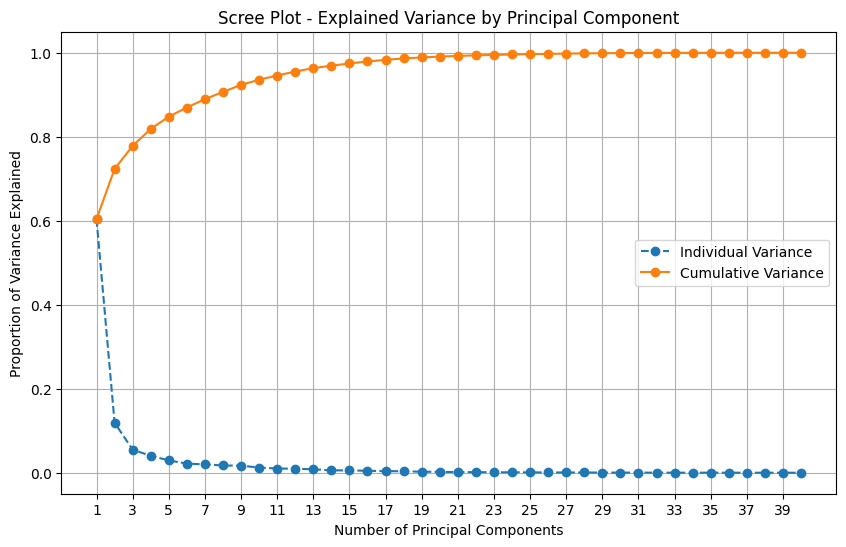

Variance explained by the first few components:
  PC1: 0.6040 (60.40%)
  PC2: 0.1192 (11.92%)
  PC3: 0.0548 (5.48%)
  PC4: 0.0404 (4.04%)
  PC5: 0.0293 (2.93%)
  PC6: 0.0217 (2.17%)
  PC7: 0.0198 (1.98%)
  PC8: 0.0173 (1.73%)
  PC9: 0.0167 (1.67%)
  PC10: 0.0124 (1.24%)

Total variance explained by first 10 components: 0.9358 (93.58%)


In [125]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Variance')

plt.title('Scree Plot - Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1, 2))
plt.legend()
plt.grid(True)
plt.show()

# Print the variance explained by the first 10 components
print("Variance explained by the first few components:")
for i, variance in enumerate(explained_variance_ratio[:10]):
    print(f"  PC{i+1}: {variance:.4f} ({variance*100:.2f}%)")

print(f"\nTotal variance explained by first 10 components: {cumulative_explained_variance[9]:.4f} ({cumulative_explained_variance[9]*100:.2f}%)")

### 8.3 Examine Component Loadings


In [130]:
# Retrieve the component loadings from the fitted PCA model
loadings = pca.components_

# Create a DataFrame to display the loadings
# Correctly generate column names based on the number of components calculated
loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=pca_df_scaled.columns
)

# Display the loadings for the first 4 components
print("Loadings for the first 4 Principal Components:")
# Use .loc to safely select columns even if fewer than 4 exist
print(loadings_df.loc[:, ['PC1', 'PC2', 'PC3', 'PC4']].head()) # Show top 5 variables

# Find the strongest variables for each component
print("\n--- Top variables contributing to each component ---")

# Look at PC1
print("\nPC1:")
pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False)
print(pc1_loadings.head(5)) # Show top 5 contributing variables

# Look at PC2
print("\nPC2:")
pc2_loadings = loadings_df['PC2'].abs().sort_values(ascending=False)
print(pc2_loadings.head(5))

# Look at PC3
print("\nPC3:")
pc3_loadings = loadings_df['PC3'].abs().sort_values(ascending=False)
print(pc3_loadings.head(5))

# Look at PC4
print("\nPC4:")
pc4_loadings = loadings_df['PC4'].abs().sort_values(ascending=False)
print(pc4_loadings.head(5))

Loadings for the first 4 Principal Components:
                               PC1       PC2       PC3       PC4
poverty_rate              0.131098  0.098661  0.002190  0.008236
per_capita_income        -0.162514 -0.066420 -0.081657 -0.088160
unemployment_rate         0.126130 -0.019068 -0.128037 -0.014844
no_health_insurance_rate  0.114923 -0.031101  0.199973  0.108106
max_aqi                   0.074430 -0.132346  0.332287  0.132699

--- Top variables contributing to each component ---

PC1:
mobility_disability_among_adults              0.176146
any_disability_among_adults                   0.175552
independent_living_disability_among_adults    0.175253
stroke_among_adults                           0.175057
frequent_physical_distress_among_adults       0.174988
Name: PC1, dtype: float64

PC2:
cancer_nonskin_or_melanoma_among_adults              0.352095
depression_among_adults                              0.344566
current_asthma_among_adults                          0.286033
lack_of_so